<div style="direction:rtl;line-height:300%;">
<font face="XB Zar" size=5>
<div align=center>
<font face="B Titr" size=5>
<p></p><p></p>
بسمه تعالی
<p></p>
</font>
<p></p>
<font>
<br>
درس بازیابی پیشرفته اطلاعات
<br>
مدرس: دکتر بیگی
</font>
<p></p>
<br>
<font>
<b>تمرین سوم</b>
</font>
<br>
<br>
موعد تحویل: ۴ دی <br>
<br>
<br>
<br>
<font>
دانشگاه صنعتی شریف
<br>
دانشکده مهندسی کامپیوتر
<br>
<br>
</font>
</div>
</font>
</div>

<span style="color: red;">
<div dir='rtl'>

<b> نام و نام‌‌خانوادگی: </b> مبینا سلیمی پناه
<!-- YOUR NAME HERE -->

<b> شماره دانشجویی: </b> ۹۹۱۰۹۷۸۸
<!-- YOUR STUDENT ID HERE -->

<b> لینک colab: </b>


<!-- UPLOAD YOUR NOTEBOOK TO GOOGLE COLAB AND MAKE SURE TO RUN ALL OF ITS CELLS -->
https://colab.research.google.com/drive/1TPQBaF_68CGyg1gVJJfiDIm_szuQr0Hx?usp=sharing
</div>
</span>

<div dir='rtl'>
<h1>
مقدمه
</h1>
<p>
در این تمرین قصد داریم به مباحث زیر بپردازیم:
<li> embedding </li>
<li> کلاسه‌بندی متن </li>
<li> کاهش ابعاد </li>
<li> خوشه‌بندی متن و هرس‌کردن خوشه‌ها</li>

دیتاست این تمرین از دیتاست‌های kaggle انتخاب شده‌است و لینک آن در بخش اول تمرین در اختیار شما قرار داده شده است.

کتابخانه‌های مورد نظرتان را هم می‌توانید در اولین سل نوت‌بوک فراخوانی کنید.
</p>
</div>

In [1]:
!pip3 install opendatasets

In [2]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [3]:
!pip install kaggle

In [4]:
!pip install fasttext

In [5]:
import opendatasets as od
import kaggle
import pandas as pd
import numpy as np
import string
import nltk
from nltk import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from tqdm import tqdm
import fasttext
import sklearn
from nltk.corpus import stopwords
nltk.download('punkt')
nltk.download('stopwords')
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import seaborn as sns
from scipy.cluster.hierarchy import dendrogram, linkage
from collections import Counter


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


<div dir='rtl'>
<h1>1.
دریافت و آماده‌سازی دیتاست
</h1>
<p>
دیتاست استفاده شده در این تمرین، مجموعه‌ای عناوین، خلاصه، و ژانر چندین کتاب است.
این دیتاست در kaggle موجود است.
ابتدا این دیتاست را با استفاده از kaggle api دریافت کنید و سپس آن را لود کنید.
<br/>
لینک دیتاست: https://www.kaggle.com/datasets/athu1105/book-genre-prediction
<br>
<i>در صورتی که با خطای 443 مواجه شدید، یا از پراکسی استفاده کنید یا از کولب.</i>
</p>
</div>

In [6]:
# TODO: Download Dataset (https://www.kaggle.com/datasets/athu1105/book-genre-prediction) Using Kaggle API
!kaggle datasets download -d athu1105/book-genre-prediction

Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 8, in <module>
    sys.exit(main())
  File "/usr/local/lib/python3.10/dist-packages/kaggle/cli.py", line 70, in main
    out = args.func(**command_args)
  File "/usr/local/lib/python3.10/dist-packages/kaggle/api/kaggle_api_extended.py", line 1493, in dataset_download_cli
    self.dataset_download_files(dataset,
  File "/usr/local/lib/python3.10/dist-packages/kaggle/api/kaggle_api_extended.py", line 1447, in dataset_download_files
    self.download_file(response, outfile, quiet, not force)
  File "/usr/local/lib/python3.10/dist-packages/kaggle/api/kaggle_api_extended.py", line 1834, in download_file
    size = int(response.headers['Content-Length'])
  File "/usr/local/lib/python3.10/dist-packages/urllib3/_collections.py", line 258, in __getitem__
    val = self._container[key.lower()]
KeyError: 'content-length'


In [7]:
!unzip book-genre-prediction.zip

unzip:  cannot find or open book-genre-prediction.zip, book-genre-prediction.zip.zip or book-genre-prediction.zip.ZIP.


In [8]:
# TODO: Load Dataset into df
df = pd.read_csv('data.csv')
df.head()

,index,title,genre,summary
0,0,Drowned Wednesday,fantasy,Drowned Wednesday is the first Trustee among ...
1,1,The Lost Hero,fantasy,"As the book opens, Jason awakens on a school ..."
2,2,The Eyes of the Overworld,fantasy,Cugel is easily persuaded by the merchant Fia...
3,3,Magic's Promise,fantasy,The book opens with Herald-Mage Vanyel return...
4,4,Taran Wanderer,fantasy,Taran and Gurgi have returned to Caer Dallben...


In [9]:
df.tail()

,index,title,genre,summary
4652,4652,Hounded,fantasy,"Atticus O’Sullivan, last of the Druids, lives ..."
4653,4653,Charlie and the Chocolate Factory,fantasy,Charlie Bucket's wonderful adventure begins wh...
4654,4654,Red Rising,fantasy,"""I live for the dream that my children will be..."
4655,4655,Frostbite,fantasy,"Rose loves Dimitri, Dimitri might love Tasha, ..."
4656,4656,Radiance,fantasy,"The Prince of no value\nBrishen Khaskem, princ..."


In [10]:
# TODO: Perform data cleaning and eda (you can add cells here)

In [11]:
df.nunique()
df.isnull().sum()
print(df.title.unique())
print(df.title.nunique())

['Drowned Wednesday' 'The Lost Hero' 'The Eyes of the Overworld' ...
 'Charlie and the Chocolate Factory' 'Red Rising' 'Radiance']
4296


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4657 entries, 0 to 4656
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   index    4657 non-null   int64 
 1   title    4657 non-null   object
 2   genre    4657 non-null   object
 3   summary  4657 non-null   object
dtypes: int64(1), object(3)
memory usage: 145.7+ KB


In [13]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
index,4657.0,2328.0,1344.504432,0.0,1164.0,2328.0,3492.0,4656.0


In [14]:
categorical=df.select_dtypes(include=['object']).columns
numerical = df.select_dtypes(include=np.number).columns.tolist()
print("Categorical Variables:")
print(categorical)
print("Numerical Variables:")
print(numerical)

Categorical Variables:
Index(['title', 'genre', 'summary'], dtype='object')
Numerical Variables:
['index']


index
Skew : 0.0


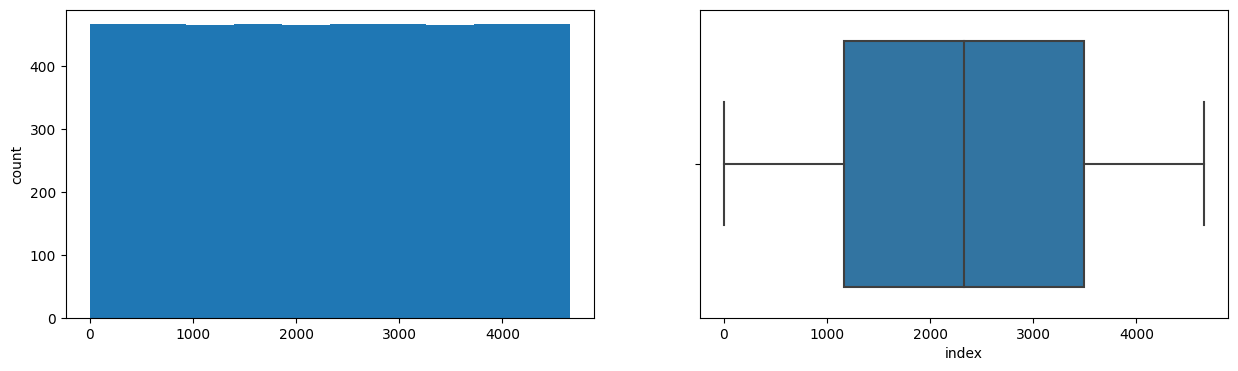

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

for col in numerical:
    print(col)
    print('Skew :', round(df[col].skew(), 2))
    plt.figure(figsize = (15, 4))
    plt.subplot(1, 2, 1)
    df[col].hist(grid=False)
    plt.ylabel('count')
    plt.subplot(1, 2, 2)
    sns.boxplot(x=df[col])
    plt.show()

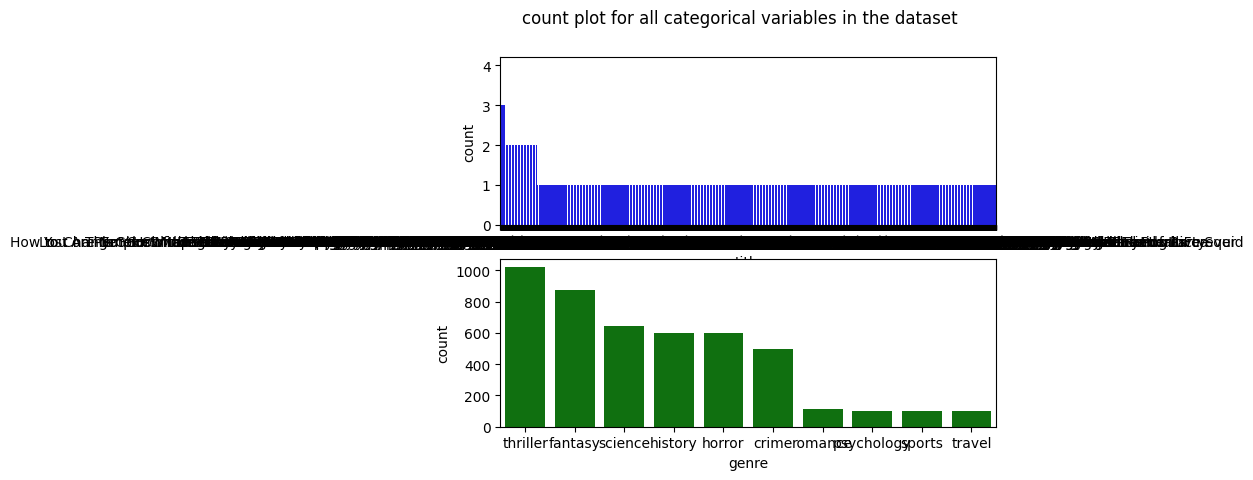

In [16]:
fig, axes = plt.subplots(2,1)
fig.suptitle('count plot for all categorical variables in the dataset')
sns.countplot(ax = axes[0], x = 'title', data = df, color = 'blue', order = df['title'].value_counts().index);
sns.countplot(ax = axes[1], x = 'genre', data = df, color = 'green', order = df['genre'].value_counts().index);

<Axes: xlabel='genre', ylabel='title'>

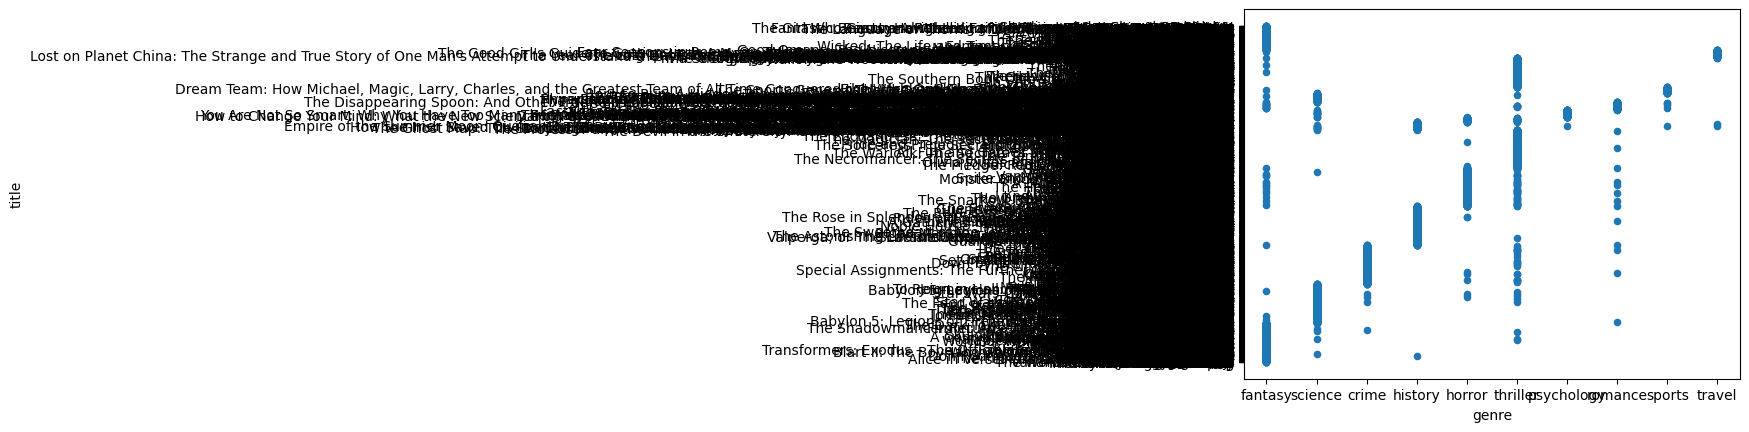

In [17]:
df.plot.scatter(x='genre', y='title')

<Axes: xlabel='index', ylabel='title'>

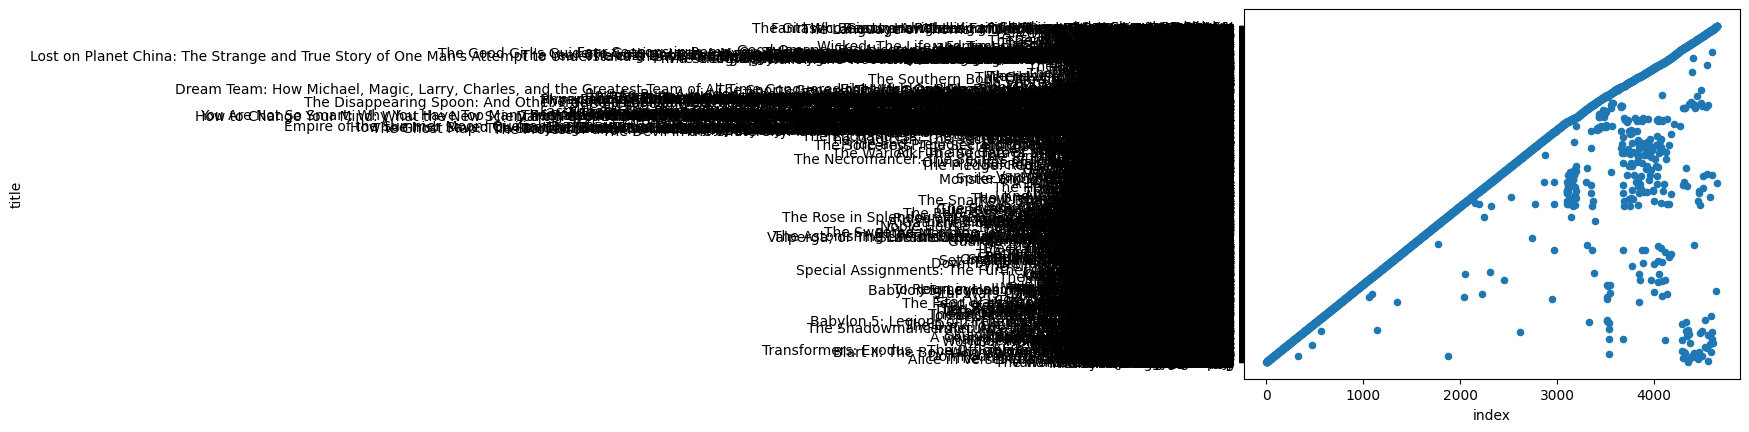

In [18]:
df.plot.scatter(x='index', y='title')

<Axes: xlabel='index', ylabel='genre'>

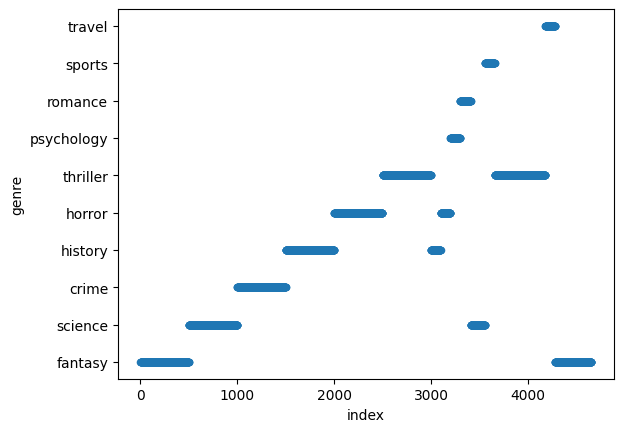

In [19]:
df.plot.scatter(x='index', y='genre')

<div dir='rtl'>
<p>
حال در این مرحله، به پیش‌پردازش متن می‌پردازیم. این پیش‌پردازش باید روی هر دو ستون title و summary اعمال شود.
برای پیش‌پردازش نیازی نیست که هرکدام از اعمال پیش‌پردازش را خودتان مانند تمارین قبل پیاده کنید. برای پیاده‌سازی تابع زیر می‌توانید از کتابخانه‌های معمول برای این کار بهره ببرید.
</p>
</div>

In [20]:
def preprocess_text(text, minimum_length=1, stopword_removal=True, stopwords_domain=[], lower_case=True,
                       punctuation_removal=True):
    """
    preprocess text by removing stopwords, punctuations, and converting to lowercase, and also filter based on a min length
    for stopwords use nltk.corpus.stopwords.words('english')
    for punctuations use string.punctuation

    Parameters
    ----------
    text: str
        text to be preprocessed
    minimum_length: int
        minimum length of the token
    stopword_removal: bool
        whether to remove stopwords
    stopwords_domain: list
        list of stopwords to be removed base on domain
    lower_case: bool
        whether to convert to lowercase
    punctuation_removal: bool
        whether to remove punctuations
    """

    # TODO: Tokenize text
    words = word_tokenize(text)

    if stopword_removal:
        stopwords = [x.lower() for x in nltk.corpus.stopwords.words('english')]
        domain = [x.lower() for x in stopwords_domain]
        words = [word for word in words if word.lower() not in domain + stopwords]

    if lower_case:
        words = [word.lower() for word in words if len(word) > minimum_length]

    if punctuation_removal:
        words = [word for word in words if word not in string.punctuation]

    else:
        words = [word for word in words if len(word) > minimum_length]

    return words

    pass

In [21]:
# TODO: Apply preprocess text on both title and summary columns
df['title'] = df['title'].apply(lambda x: preprocess_text(x))
df['summary'] = df['summary'].apply(lambda x: preprocess_text(x))

<div dir="rtl">
در نهایت بعد از اپلای کردن پیش‌پردازش روی هر دو ستون، دو ستون پیش‌پردازش شده را با هم ادغام کنید و آن را در یک آرایه به نام X قرار دهید.
</div>

In [22]:
# TODO: Merge preprocessed columns
title_and_sammary = df['title'] + df['summary']
X = np.array(title_and_sammary)
print(X[:15])


[list(['drowned', 'wednesday', 'drowned', 'wednesday', 'first', 'trustee', 'among', 'morrow', 'days', 'arthur', "'s", 'side', 'wishes', 'fulfilled', 'appears', 'leviathan/whale', 'suffers', 'gluttony', 'book', 'begins', 'leaf', 'visiting', 'arthur', 'discussing', 'invitation', 'drowned', 'wednesday', 'sent', 'arthur', 'admitted', 'hospital', 'damage', 'done', 'leg', 'attempted', 'enter', 'tuesday', "'s", 'treasure', 'tower', 'suddenly', 'hospital', 'room', 'becomes', 'flooded', 'water', 'two', 'transported', 'border', 'sea', 'house', 'leaf', 'snatched', 'away', 'large', 'ship', 'green', 'sails', 'known', 'flying', 'mantis', 'arthur', 'remains', 'bed', 'medallion', 'given', 'immortal', 'called', 'mariner', 'apparently', 'fails', 'summon', 'help', 'arthur', 'without', 'hope', 'eventually', 'buoy', 'marking', 'pirate', 'elishar', 'feverfew', "'s", 'treasure', 'floats', 'toward', 'soon', 'arthur', 'opens', 'hand', 'marked', 'bloody', 'red', 'colour', 'arthur', 'red', 'hand', 'feverfew', 'm

In [23]:
df['title and summary'] = df['title'] + df['summary']
df.head()

,index,title,genre,summary,title and summary
0,0,"[drowned, wednesday]",fantasy,"[drowned, wednesday, first, trustee, among, mo...","[drowned, wednesday, drowned, wednesday, first..."
1,1,"[lost, hero]",fantasy,"[book, opens, jason, awakens, school, bus, una...","[lost, hero, book, opens, jason, awakens, scho..."
2,2,"[eyes, overworld]",fantasy,"[cugel, easily, persuaded, merchant, fianosthe...","[eyes, overworld, cugel, easily, persuaded, me..."
3,3,"[magic, 's, promise]",fantasy,"[book, opens, herald-mage, vanyel, returning, ...","[magic, 's, promise, book, opens, herald-mage,..."
4,4,"[taran, wanderer]",fantasy,"[taran, gurgi, returned, caer, dallben, follow...","[taran, wanderer, taran, gurgi, returned, caer..."


<div dir="rtl">
<h2>1-1.
Embedding
</h2>

در این قسمت از fasttext کمک می‌گیریم تا به یک embedding اولیه برای هر کتاب برسیم.
    با استفاده از داده‌هایی که داریم یک مدل fasttext آموزش دهید که برای هر توکن یک امبدینگ ۱۰۰تایی بدهد.
    در مرحله‌ی بعد میانگین وزن دار امبدینگ های fasttext
        توکن‌های ورودی (چکیده + عنوان)
    را بر اساس tfidif آن‌ها محاسبه کنید و به امبدینگ نهایی متن برسید.
    <br>
    در واقع به عبارت ساده‌تر بر اساس میانگین وزن‌دار که وزن‌های ما tfidf توکن‌ها می‌باشد به امبدینگ نهایی متن بر اساس fasttext می‌رسیم.
</div>

In [26]:

class FastText:

    def __init__(self, preprocessor=preprocess_text, method='skipgram'):
        self.method = method
        self.model = None
        self.preprocessor = preprocessor

    def train(self, texts):
        """
        train the fasttext model and save it into self.model
        Parameters
        ----------
        texts: list of list of str
        """

        # TODO
        texts = [" ".join(self.preprocessor(text)) for text in texts]

        with open("train.txt", "w") as f:
            for text in texts:
                f.write(text + "\n")
            f.close()

        self.model = fasttext.train_unsupervised('train.txt', model=self.method, dim=100, epoch=5)

        pass

    def get_query_embedding(self, query, tf_idf_vectorizer):
        """
        get the embedding of the query. You can use the tf_idf_vectorizer to get the weights of the words in the query. preprocess the query using self.preprocessor if it is not None
        Parameters
        ----------
        query: str
        tf_idf_vectorizer: TfidfVectorizer
        Returns embedding of the query
        """

        # TODO
        processed_query = self.preprocessor(query)

        tf_idf_vector = tf_idf_vectorizer.transform([' '.join(processed_query)]).toarray()
        features = tf_idf_vectorizer.vocabulary_.keys()
        query_embedding = np.zeros(self.model.get_dimension())

        for word in processed_query:
            if word in features:
                query_embedding += self.model.get_word_vector(word) * tf_idf_vector[0][tf_idf_vectorizer.vocabulary_[word]]

        return query_embedding / np.sum(tf_idf_vector) if np.sum(tf_idf_vector) > 0 else 1
        pass

    def save_FastText_model(self, path='FastText_model.bin'):
        self.model.save_model(path)

    def load_FastText_model(self, path="FastText_model.bin"):
        self.model = fasttext.load_model(path)

    def prepare(self, dataset, mode, save=False):
        if mode == 'train':
            self.train(dataset)
        if mode == 'load':
            self.load_FastText_model()
        if save:
            self.save_FastText_model()

In [27]:
# TODO: Train fasttext on X
fasttext_model = FastText()
X = [' '.join(pair) for pair in X]
fasttext_model.prepare(X, mode='train', save=True)

In [28]:
print(X[:2])

["drowned wednesday drowned wednesday first trustee among morrow days arthur 's side wishes fulfilled appears leviathan/whale suffers gluttony book begins leaf visiting arthur discussing invitation drowned wednesday sent arthur admitted hospital damage done leg attempted enter tuesday 's treasure tower suddenly hospital room becomes flooded water two transported border sea house leaf snatched away large ship green sails known flying mantis arthur remains bed medallion given immortal called mariner apparently fails summon help arthur without hope eventually buoy marking pirate elishar feverfew 's treasure floats toward soon arthur opens hand marked bloody red colour arthur red hand feverfew marks whoever found treasure identify later long scavenging ship called moth rescues arthur board arthur going name arth introduced sunscorch first mate captain catapillow journey brings line storms border sea later pursued feverfew 's ghostly ship shiver damage inflicted moth serious therefore sunsc

In [29]:
# TODO: Get nearest neighbors of an arbitrary word using fasttext
fasttext_model.model.get_nearest_neighbors('hero')

[(0.9113951921463013, 'herod'),
 (0.8844647407531738, 'heroin'),
 (0.8683628439903259, 'herodotus'),
 (0.8642034530639648, 'herald'),
 (0.8461734056472778, 'heroine'),
 (0.842873215675354, 'herd'),
 (0.837040364742279, 'swordsman'),
 (0.8270420432090759, 'herr'),
 (0.8223397731781006, 'riordan'),
 (0.8192309737205505, 'theroux')]

<div dir="rtl">
در این مرحله آرایه X را روی TFIDF فیت می‌کنیم.
</div>

In [30]:
class TF_IDF:

    def __init__(self):
        self.vectorizer = TfidfVectorizer()

    def fit_vectorizer(self, data):
        """
        fit the vectorizer on the data
        Parameters
        ----------
        data: list of list of str
        """
        self.vectorizer.fit_transform(data)
        pass
        # TODO

In [31]:
# TODO: Fit TFIDF Vectorizer on X
tfidf_model = TF_IDF()
tfidf_model.fit_vectorizer(X)

In [32]:
# TODO: Get Embedding of an arbitrary query using your prior implemention
text = "computer networks"
embedding = fasttext_model.get_query_embedding(text, tfidf_model.vectorizer)
print(embedding)

[ 0.35156296 -0.09355338 -0.16249349  0.03926179  0.22908578 -0.15619742
 -0.44100201  0.07547059 -0.08019512  0.04041695 -0.22394212  0.11378975
 -0.51692848  0.03507055  0.33033056 -0.23991116  0.32892315  0.19640372
 -0.02330509  0.21439355  0.07664822 -0.17745744  0.25712334 -0.26874515
  0.08359913 -0.11706555 -0.13984737 -0.38293056  0.15417297 -0.09945509
 -0.13868724 -0.10864915  0.12144587  0.32357023 -0.13879556  0.21264575
  0.19342854  0.12240013  0.10528798  0.07558936 -0.03645275  0.06226606
  0.14780298  0.3768306  -0.09418243  0.23958218 -0.16545177 -0.12089132
  0.31578839 -0.2074055   0.23110762  0.04956586 -0.52815016 -0.23697068
  0.11075819  0.21528411  0.18894245  0.15479318 -0.52242812  0.20822917
  0.22788527 -0.25760627 -0.00538228  0.34022014  0.11071319 -0.05487158
  0.26255006 -0.27671574  0.37483261  0.20608079 -0.52808455  0.2748544
  0.18147856 -0.15982047  0.10617053  0.1305512  -0.063693   -0.13290263
 -0.2375408  -0.09828175 -0.1138768   0.34423558  0.

<div dir="rtl">
در نهایت، تمامی entry های درون X را به صورت امبدینگ دربیاورید و آن را در X ذخیره کنید.
</div>

In [33]:
# TODO: Get embedding on each document in X
emb = []
for x in X:
    emb.append(fasttext_model.get_query_embedding(x, tfidf_model.vectorizer))
print(emb[0])
print(len(emb))
print(len(X))

[-0.20142862 -0.97193027 -1.20868929  0.11046881  0.68658358 -0.44865562
 -2.13577732  0.1247116   0.29328169  0.22009446  0.02200501  0.93472279
 -0.61474794 -0.39021308  0.28369319  0.41741521  0.39574289  0.17398859
  0.67645228 -0.12476058 -0.475863   -0.36917781  1.20435981 -1.0950243
  1.03078754  0.07959885 -0.05200129 -0.35836577 -0.01784564  0.40983375
  1.60240335 -0.09696968 -1.22617881  1.12609144 -0.60197334  0.36715999
 -0.49425313  0.06820239 -0.27046083 -0.1862365  -0.17176793  0.13842451
 -0.41173303  0.03786508  0.15310868 -0.73663265  0.2226988   0.81143452
 -0.26732492 -0.81339196 -0.74871489 -0.56817365 -1.4952471  -0.33729204
 -0.51945933  1.18966122  0.21329954 -0.23095455 -0.04999574  0.34747549
 -1.14050671  0.43953792  0.71380146  0.46924153  1.34654327  0.41743655
  0.14278638 -0.19122875  0.46422408 -0.29223919 -1.20037695  0.4965355
 -0.11066333  0.81524454 -0.34642623  0.94647919 -0.40213967 -0.21180756
 -0.7218717   0.09004673 -0.05552457  0.73975168  0.2

<div dir='rtl'>
<h2>1-2.
آماده‌سازی داده تمرین و تست
</h2>
<p>
در این بخش ابتدا می‌خواهیم تا داده‌ای که می‌خواهیم بر اساس آن کلاسه‌بندی کتاب‌ها را انجام دهیم، که همان ژانر کتاب‌ها است را انکود کنیم.
<br>
سپس با جداسازی داده آموزش و تست، به آموزش مدل‌های کلاسه‌بند می‌پردازیم.
</p>
</div>

In [34]:
# TODO: Encode genres with values between 0 and n_classes-1 and save it in array Y
encoder = LabelEncoder()
encoder.fit(df['genre'])
Y = encoder.transform(df['genre'])
#print(np.where(Y == 9))


In [35]:
# TODO: Split data into train and test (test size = 20%)
vectorizer = CountVectorizer()
vectorizer.fit(X)
data = vectorizer.transform(X)
x_train, x_test, y_train, y_test = train_test_split(data, Y , test_size=0.2, random_state=62)

<div dir="rtl">
<h1>2.
کلاسه‌بندی متن
</h1>
در این بخش می‌خواهیم تا با استفاده از داده‌هایی که داریم، سه مدل کلاسه‌بندی متن را آموزش دهیم و عملکرد آن‌ها را با هم مقایسه کنیم.
</div>

<div dir="rtl">
<h2>2-1.
SVM و Naive Bayes
</h2>
با استفاده از توابع آماده در sklearn، کلاسه‌بند SVM و Naive Bayes را روی داده آموزش تمرین دهید. سپس، ژانر داده تست را با استفاده از مدل آموزش داده شده پیش‌بینی کنید و آن را در آرایه‌های NB_prediction و SVM_prediction ذخیره کنید.</div>

In [36]:
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report

In [37]:
# TODO: Train Sklearn's SVM and Naive Bayes implementation on X_train and Y_train
svm = SVC()
nb = MultinomialNB()

svm.fit(x_train, y_train)
nb.fit(x_train, y_train)


MultinomialNB()

In [38]:
# TODO: Predict on X_test using the trained models
NB_prediction = nb.predict(x_test)
SVM_prediction = svm.predict(x_test)


<div dir="rtl">
<h2>2-2.  
Rocchio
</h2>
می‌خواهیم روش Rocchio را از
پایه پیاده‌سازی کنیم.
با توجه به شواهد نوشته شده هر تابع را کامل کنید و با آموزش مدل روی داده‌های train
لیبل‌های داده‌های test
را پیش بینی کنید و آن را در rocchio_prediction ذخیره کنید.
</div>

In [39]:
class RocchioTextClassifier:
    def __init__(self, preprocessor=None):
        self.preprocessor = preprocessor
        self.centroids = None

    def calculate_centroids(self, X, y):
        """
        Calculates the centroids of each class in the dataset. A centroid is defined as the mean vector of all the feature vectors in a class.

        Parameters
        ----------
        X : np.ndarray
            An array contaning the feature vectors of each sentence.

        y : np.ndarray
            An array containing the class labels for each feature vector in X.

        Sets self.centeroids as a dictionary where keys are unique class labels from 'y', and values are the calculated centroids (mean vectors) for each class.
        """
        self.centroids = {}
        labels = np.unique(y)
        #print(labels)
        for label in labels:
            feature_vectors = X[y == label]
            centroid = np.mean(feature_vectors, axis=0)
            self.centroids[label] = centroid
        # TODO
        pass

    def predict_label(self, x):
        """
        Classifies a new instance by finding the class whose centroid is closest to the new instance's vector.

        Parameters
        ----------
        X : np.ndarray
            An array of a new instance to be classified.

        Returns
        -------
        object
            The predicted label for the input.
        """
        # TODO
        closest_centroid = None
        dist = float('inf')
        for label, centroid in self.centroids.items():
          distance = np.linalg.norm(x - centroid)
          if distance < dist:
            dist = distance
            closest_centroid = label
        return closest_centroid
        pass

    def predict(self, X):
        """
        Classifies the array X

        Parameters
        ----------
        X : np.ndarray
            An array of new instances to be classified.

        Returns
        -------
        object
            The predicted label for each input.
        """
        return np.array([self.predict_label(x) for x in X])


In [40]:
# TODO: Train your Rocchio implementation on X_train and Y_train
rocchio = RocchioTextClassifier()
rocchio.calculate_centroids(x_train, y_train)

In [41]:
# TODO: Predict on X_test using the trained model
rocchio_prediction = rocchio.predict(x_test)
# print(rocchio_prediction)

<div dir="rtl">
<h2>2-3.
ارزیابی
</h2>
برای هر سه روش پیاده‌سازی شده، معیار‌های ارزیابی زیر را بررسی کنید.
<br>
f1 score, accuracy, precision, recall
<br>
سپس، نتایج به دست آمده را با هم در چهار نمودار مقایسه کنید.
</div>

In [42]:
from sklearn.metrics import recall_score, precision_score, f1_score, accuracy_score, confusion_matrix

In [43]:
def evaluation (y_true, y_pred):
    recall = recall_score(y_true, y_pred, average='macro')
    precision = precision_score(y_true, y_pred, average='macro')
    accuracy = accuracy_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred, average='macro')

    print(f"Recall: {recall }")
    print(f"Precision: {precision}")
    print(f"Accuracy: {accuracy}")
    print(f"F1-Score: {f1}")

    return recall, precision, accuracy, f1

In [44]:
# TODO: Run evaluation metrics on the predictions
print(f"Performance Metrics for Naive Bayes")
NB_metrics = evaluation(y_test, NB_prediction)

print(" ")
print(f"Performance Metrics for SVM")
SVM_metrics = evaluation(y_test, SVM_prediction)

print(" ")
print(f"Performance Metrics for Rocchio")
Rocchio_metrics = evaluation(y_test, rocchio_prediction)

Performance Metrics for Naive Bayes
Recall: 0.4125618595889131
Precision: 0.4346143920967789
Accuracy: 0.6384120171673819
F1-Score: 0.4074888984844141
 
Performance Metrics for SVM
Recall: 0.29404434453275885
Precision: 0.3883733205767594
Accuracy: 0.4946351931330472
F1-Score: 0.2957416748419213
 
Performance Metrics for Rocchio
Recall: 0.5343498250622754
Precision: 0.5201603737183332
Accuracy: 0.40665236051502146
F1-Score: 0.42906584408498405


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


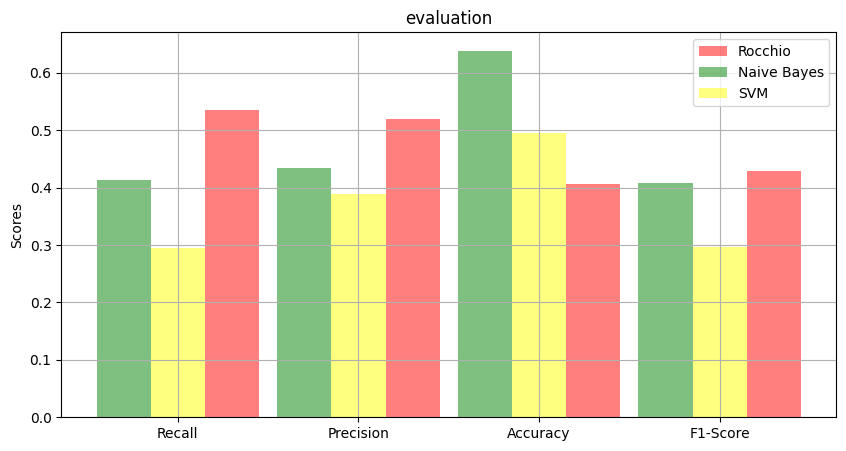

In [45]:
# TODO: Plot evaulations

eval = ['Recall', 'Precision', 'Accuracy', 'F1-Score' ]
metric = list(range(len(eval)))
width = 0.3

fig, ax = plt.subplots(figsize=(10, 5))

plt.bar([m + width for m in metric], Rocchio_metrics, width, alpha=0.5, label='Rocchio', color='red')
plt.bar([m - width for m in metric], NB_metrics, width, alpha=0.5, label='Naive Bayes', color='green')
plt.bar(metric, SVM_metrics, width, alpha=0.5, label='SVM', color='yellow')


ax.set_title('evaluation')
ax.set_ylabel('Scores')
ax.set_xticks([m for m in metric])
ax.set_xticklabels(eval)

plt.legend(['Rocchio' , 'Naive Bayes', 'SVM'], loc='upper right')
plt.grid()
plt.show()


In [46]:
# TODO: Draw confusion matrix

def draw_matrix(model_name, y_true, y_pred):
    matrix = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(10, 5))
    sns.heatmap(matrix, annot=True, cmap="Reds")
    plt.title(f'{model_name} Confusion Matrix')
    plt.ylabel('Actuals')
    plt.xlabel('Predictions')
    plt.show()


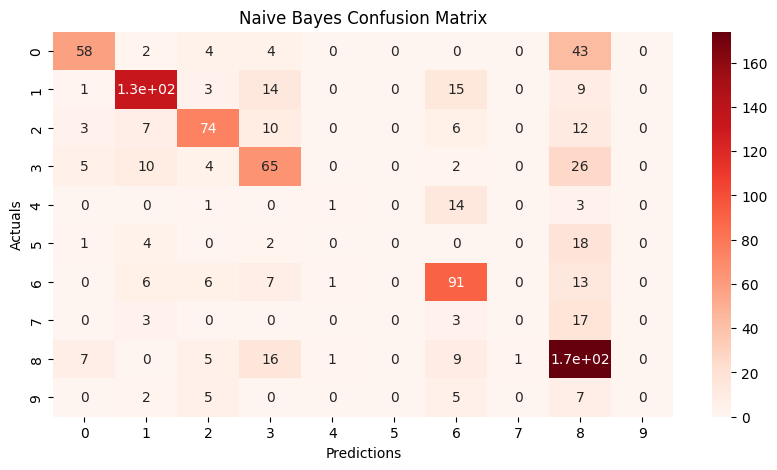

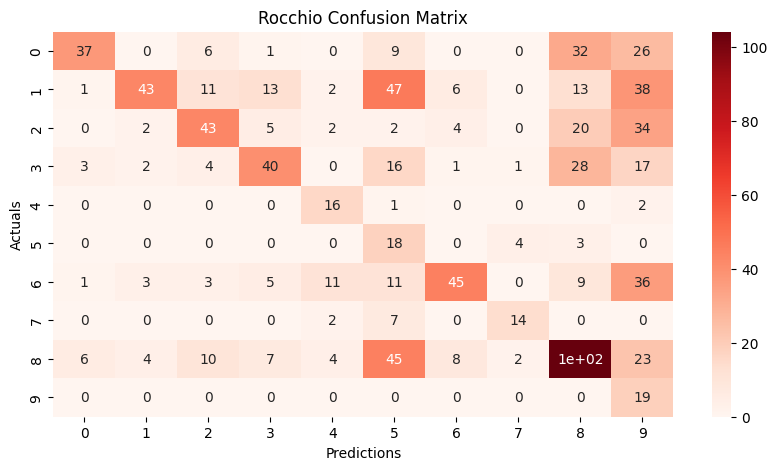

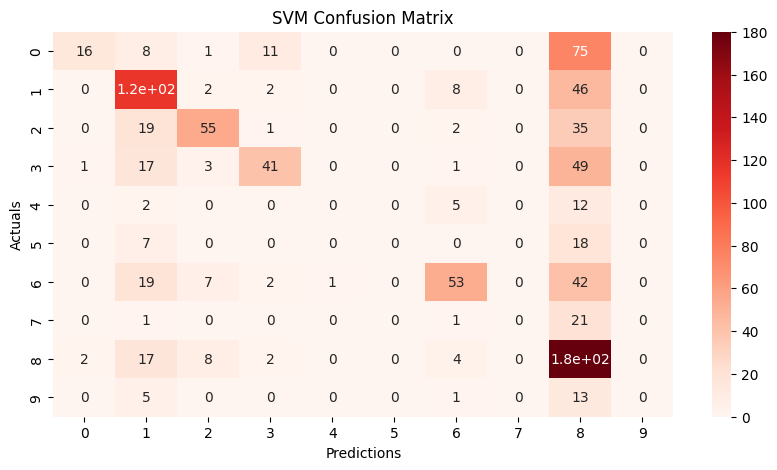

In [47]:
draw_matrix( 'Naive Bayes', y_test, NB_prediction)
draw_matrix( 'Rocchio', y_test, rocchio_prediction)
draw_matrix( 'SVM', y_test, SVM_prediction )

<div dir="rtl">
کدام مدل از همه دقیق‌تر عمل کرد؟ نتیجه‌گیری و تحلیل خود از نتایج ارزیابی را گزارش دهید.
</div>

<span style="color: red;">#TODO: Write your answer in here.</span>




Naive Bayes: It has relatively balanced precision and recall scores, and a moderate F1-Score. This suggests that it achieves a good trade-off between precision and recall. it also has the highest accuracy betwenn other models.

SVM: While SVM has a lower accuracy than nb but better than rocchio model, it also shows lower precision, recall, and F1-Score compared to Naive Bayes and rocchio. It might struggle with both false positives and false negatives and  appears to display the least favorable performance among the three.

Rocchio: Rocchio has the highest recall and precision among all, resulting in a balanced F1-Score. but Its accuracy is the lowest, indicating it might misclassify a significant portion of instances.

Considering the trade-off between precision and recall, the choice of the "best" model depends on the specific requirements of your application. If false positives and false negatives have different impacts on your problem, you might prioritize precision or recall accordingly. In this case, Naive Bayes seems to offer a balanced performance in the task of clustering, but the choice ultimately depends on the application's context and priorities.


<div dir="rtl">
<h1>3.
کاهش ابعاد و خوشه‌بندی متن
</h1>
</div>

<div dir="rtl">
<h2>3-1.
کاهش ابعاد
</h2>
</div>

<div dir="rtl">
<h3>3-1-1.
PCA
</h3>
یکی از روش‌های کاهش ابعاد، PCA است. با استفاده از پیاده‌سازی آن در کتابخانه sklearn، ابعاد ویژگی‌های X را کاهش دهید.
<br>
سپس با استفاده از explained_variance_ratio_ در الگوریتم PCA  نشان دهید که با وجود یک ترشولد 90 درصد تا چه میزان میتوان ابعاد ویژگی ها را کم تر کرد.
</div>

In [48]:
def reduce_dimension(embedding, n_components):
    """
    Performs dimensional reduction using PCA with n components left behind

    Parameters
    ----------
    embeddings : List
        A list of embeddings of documents

    n_components: int
        Number of components to keep

    Returns a list of reduced embeddings
    """
    # TODO
    pca = PCA(n_components = n_components)
    reduced_result = pca.fit_transform(embedding)
    return reduced_result
    pass

reduce_dimension(emb, 7)

array([[ 2.62837136e+00,  9.61941110e-01,  2.37341581e-01, ...,
        -1.84351464e+00,  9.78100111e-01,  2.79481950e-01],
       [ 9.11451371e-01,  1.77892011e-03,  3.66702103e-01, ...,
         1.99674399e-01, -1.21342161e-01, -3.82406934e-01],
       [-7.05351683e-02,  7.32755254e-01,  1.47180788e-01, ...,
        -8.90836387e-02, -9.77375719e-02, -2.85807766e-01],
       ...,
       [-1.08512014e+00,  1.79763964e-01,  3.91285444e-01, ...,
         1.56924819e-01,  1.30786780e-01,  1.87663537e-01],
       [-7.30529113e-01, -1.27904703e-01, -2.33399592e-02, ...,
         1.05198587e-01,  4.37896257e-01, -1.15859809e-01],
       [-1.22344877e+00,  1.77085517e-01, -1.26540318e-01, ...,
         5.01668049e-02,  3.75607166e-01,  4.87179850e-02]])

<div dir="rtl">
در این قسمت می‌توانید برای شهود بهتر، نمودار رسم کنید و همچنین برای ساده‌تر شدن کار، از pipeline‌های sklearn بهره ببرید.
<br>
<i> انجام این کار‌ها صرفا توصیه است و اجباری نیست. </i>
</div>

In [49]:
# TODO: Findout the most reduced dimension which has 90% cutoff explained variance.
def find_optimal_components(embeddings, threshold=0.9):
    pca = PCA()
    pca.fit(embeddings)
    cum_var = pca.explained_variance_ratio_.cumsum()
    # print(explained_variance)
    n_components = np.argmax(cum_var >= threshold) + 1
    total_variance = cum_var[n_components - 1]

    return n_components, total_variance

components, variance = find_optimal_components(emb)

print(f"Number of optimal components : {components}")
print(f"Total variance : {variance}")

Number of optimal components : 15
Total variance : 0.9023930085729877


In [50]:
from sklearn.pipeline import Pipeline
pca_pipeline =  Pipeline([('pca', PCA(n_components=14))])
reduced_X = pca_pipeline.fit_transform(emb)

<div dir="rtl">
<h3>3-1-2.
TSNE
</h3>
<br>
     برای اینکه بتوانید در مراحل بعدی، نتایج خوشه‌بندی را مشاهده کنید، در این قسمت به پیاده‌سازی تابع کاهش بعد بردارهای جاسازی با استفاده از روش T-SNE می‌پردازید.
برای اینکار تابع convert_to_2d_tsne را پیاده‌سازی می‌کنید که لیستی از بردارهای جاسازی را به عنوان ورودی دریافت می‌کند و در خروجی، لیستی از بردارهای جاسازی کاهش بعد داده شده به دو بعد را تولید می‌کند. برای پیاده سازی این تابع می‌توانید از کتابخانه‌های آماده استفاده کنید.
<br>
توجه کنید که از بردارهای خروجی این قسمت <u>صرفا برای رسم نمودار</u> استفاده می‌کنید و تمامی مراحلی که در ادامه طی می‌کنید (به جز رسم نمودار)، باید با استفاده از بردارهای کاهش بعد داده <u>نشده</u> انجام شوند.
</div>


In [51]:
from sklearn.manifold import TSNE
def convert_to_2d_tsne(emb_vecs):
    """
    Converts each raw embedding vector to 2d vector

    Parameters
    ----------
    emb_vecs : List
        A list of vectors

    Returns a list of 2d vectors
    """

    # TODO: Convert each input vector to 2d vector
    tsne = TSNE(n_components=2)
    converted = tsne.fit_transform(emb_vecs)
    return converted
    pass


In [52]:
# TODO: Uncomment the following code
X_2d = convert_to_2d_tsne(np.array(emb))

<div dir="rtl">



<h2>3-2.
خوشه‌بندی
</h2>
</div>

<div dir="rtl">
<h3>3-2-1.
K-Means
</h3>

<div dir="rtl">
در این قسمت، شما ابتدا الگوریتم خوشه‌بندی K-means را
<u><b>از پایه</b></u>
 پیاده‌سازی می‌کنید.

</div>

In [53]:
from typing import List
import random

def cluster_kmeans(emb_vecs, n_clusters, max_iter = 50):
    """
    Clusters input vectors using K-means method

    Parameters
    ----------
    emb_vecs : List
        A list of vectors

    n_clusters: int
        Number of clusters

    Returns
    -------
    list
        Two lists: 1) A list containing cluster centers 2) A list containing cluster index for each input vector
    """

    # TODO: Implement K-means method from scratch
    # You can't use sklearn.cluster.KMeans for clustering
    # implement kmeans clustering here

    emb_matrix = np.array(emb_vecs)

    # Randomly initialize centroids
    initial_centroids = emb_matrix[np.random.choice(emb_matrix.shape[0], n_clusters, replace=False)]

    for _ in range(max_iter):  # You can adjust the number of iterations
        cluster_indices = np.zeros(emb_matrix.shape[0])

        # Compute distances between data points and centroids
        for iter, v in enumerate(emb_matrix):
            distances = np.sqrt(np.sum((v - initial_centroids) ** 2, axis=1))
            closest_centroid = np.argmin(distances)

           # Assign each point to the closest centroid
            cluster_indices[iter] = closest_centroid


        # Update centroids
        for j in range(n_clusters):
            initial_centroids[j] = emb_matrix[cluster_indices == j].mean(axis=0)

    return initial_centroids.tolist(), cluster_indices.tolist()

cluster_centers, clusters = cluster_kmeans(np.asarray([x for x in emb]), 8)

In [ ]:
print(cluster_centers)
print(len(clusters))


<div dir="rtl">
 با استفاده از K-Means خوشه‌های اسناد را ایجاد کنید. الگوریتم را با استفاده از چند مقدار مختلف تعداد خوشه‌ها (k) اجرا کنید. در هربار اجرا، با استفاده از تعدادی از اسناد موجود در هر خوشه، موضوع آن خوشه را تعیین کرده و خوشه‌بندی حاصله را با استفاده از بردار‌های دوبعدی قسمت قبل، رسم کنید. با اینکار، پیاده‌سازی خود و همچنین کارایی این الگوریتم در خوشه‌بندی اسناد و قرار دادن اسناد مشابه در خوشه‌های یکسان را بررسی کنید.
<br>
 نمودار silhouette score برای مقدار‌های مختلف k را رسم کرده و silhouette analysis برای انتخاب k مناسب انجام دهید.
 همچنین با استفاده از داده‌های دارای برچسب، مقدار purity به ازای k را رسم کرده و مقدار purity برای k نهایی را گزارش کنید.
<br>
</div>

In [54]:

def purity_score(y_true, y_pred):
    """
    Calculate the purity score for the given cluster assignments and ground truth classes

    y_true: list
        ground truth labels for each document

    y_pred: list
        predicted labels for each document

    Returns a purity score between 0.0 and 1.0 (higher is better)
    """
    #TODO
    total_correct = 0

    for c in set(y_pred):
        clusters = [i for i, x in enumerate(y_pred) if x == c]
        labels = [y_true[i] for i in clusters]
        Common_labels = Counter(labels).most_common(1)[0][1]
        total_correct += Common_labels

    return total_correct / len(y_true)
    pass

In [55]:
from sklearn.metrics import silhouette_score

# TODO: Calculate silhouette score and purity score
K_val = [2, 5, 7, 10, 12, 20, 30, 40, 50, 63]
silhouette_scores = []
purity_scores = []

for k in K_val:
    centroids, labels = cluster_kmeans(np.array(emb), k)
    silhouette_scores.append(silhouette_score(np.array(emb), labels))
    purity_scores.append(purity_score(Y, labels))


In [56]:
def plot_scores(K_values, silhouette_scores, purity_scores, score_type):
    plt.figure(figsize=(10, 5))

    if score_type == 'silhouette':
        plt.plot(K_values, silhouette_scores, marker='o', color='pink')
        plt.ylabel('Silhouette Scores')
    elif score_type == 'purity':
        plt.plot(K_values, purity_scores, marker='o', color='green')
        plt.ylabel('Purity Scores')

    plt.xlabel('K values')
    plt.title(f'{score_type.capitalize()} Scores')
    plt.show()

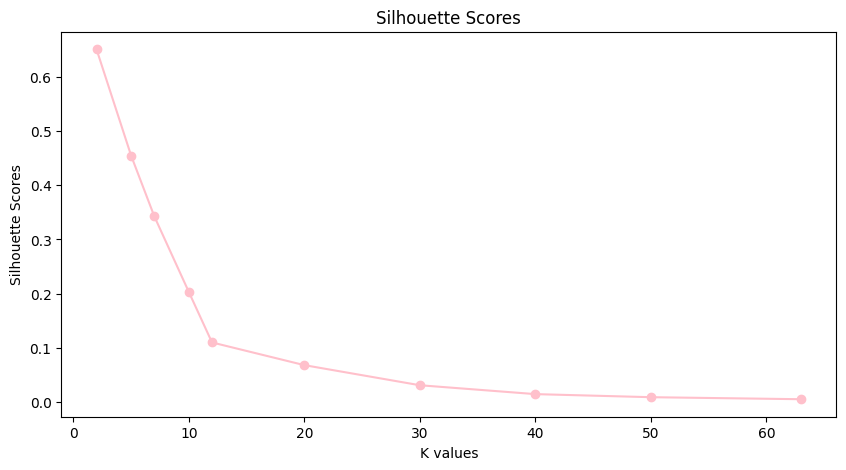

In [57]:
# TODO: Plot silhouette score for different value of k (at least 5 different k values)
plot_scores(K_val, silhouette_scores, purity_scores, 'silhouette')

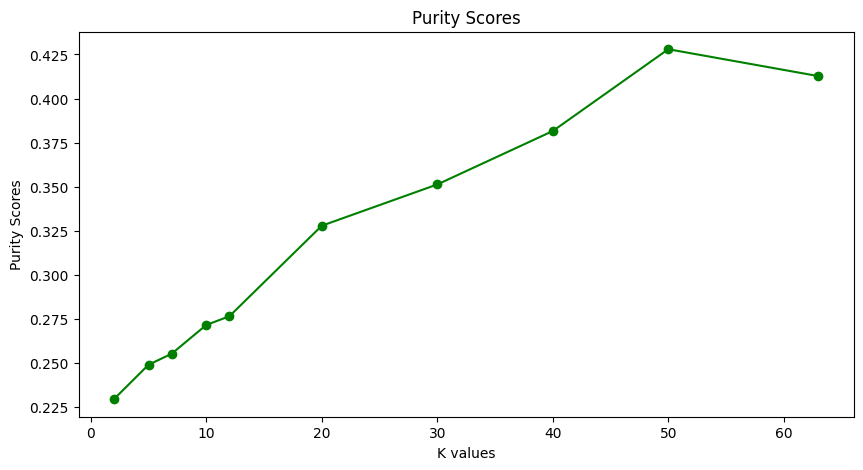

In [58]:
#TODO: plot purity for different value of k (at least 5 different k values)
plot_scores(K_val, silhouette_scores, purity_scores, 'purity')

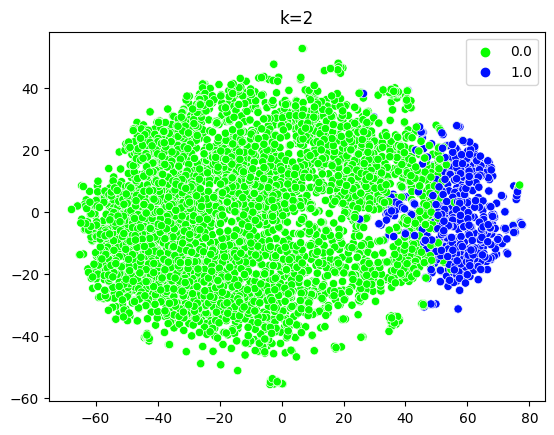

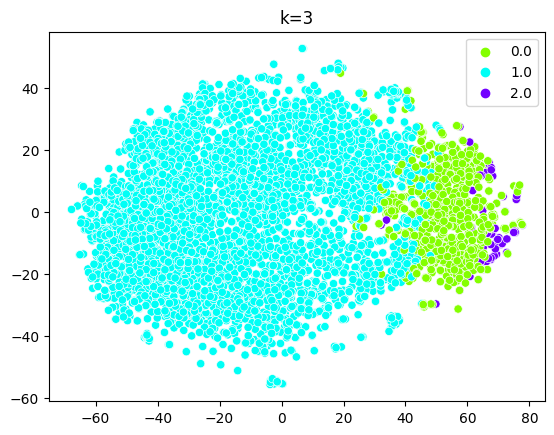

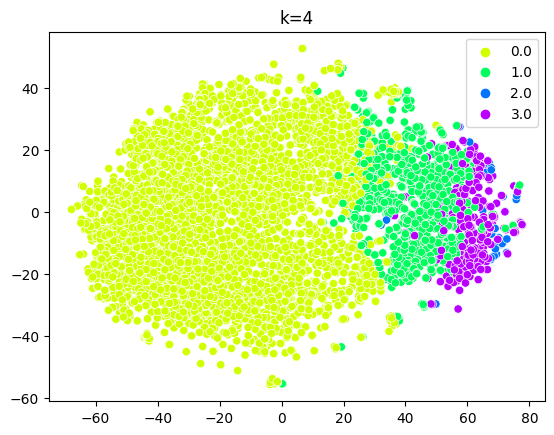

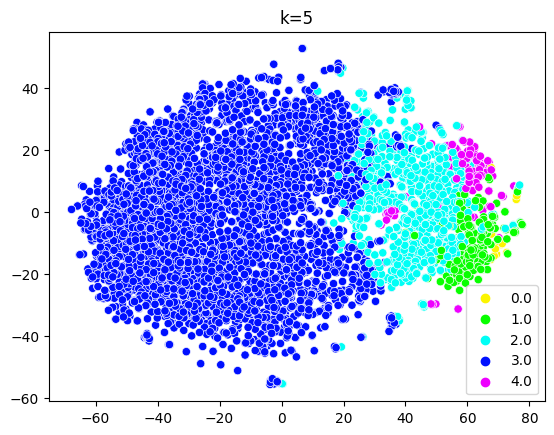

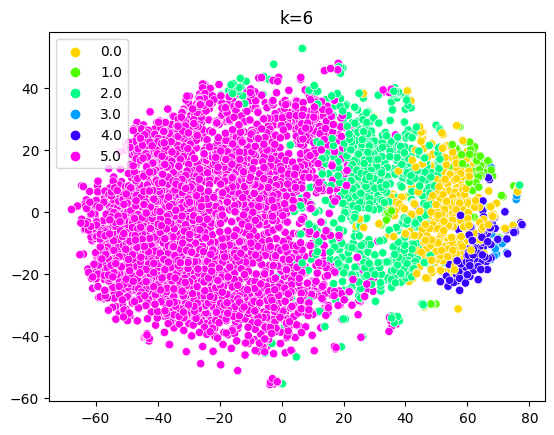

In [59]:
def plot_clusters(X, embeddings, K_val):
    for k in K_val[:5]:
        _, labels = cluster_kmeans(np.array(embeddings), k)
        plt.figure()
        sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=labels, palette=sns.color_palette("hsv", k))
        plt.title(f'k={k}')
        plt.show()

plot_clusters(X_2d, emb, [2, 3, 4, 5, 6])

<div dir="rtl">
با استفاده از نمودارهای رسم شده توضیح دهید بهترین k برای انتخاب در داده ما با استفاده از الگوریتم K-Means چیست؟
چرا؟
</div>

<span style="color: red;">#TODO: Write your answer in here.</span>

To make decision about k, we often resort to the elbow method, observing where the silhouette score starts to plateau before any significant decline. in this silhouette plot a less steep decline is noticeable after k=10. Similarly, in the purity plot, the increase in purity begins to level off around k=10.
Thus, k=10 appears to strike a balance between distinctiveness and homogeneity, making it a plausible choice based on the provided plots.

<div dir="rtl">
<h3>3-2-2.
Hierarchical clustering
</h3>
</div>

<div dir="rtl">
تکنیک خوشه‌بندی سلسله مراتبی یکی از تکنیک‌های خوشه‌بندی در یادگیری ماشین است. در این قسمت شما می‌توانید از لایببری scipy یا هر لایبرری دیگری در پایتون استفاده کنید تا داده‌ها را به صورت سلسله‌مراتبی خوشه‌بندی کنید. سپس می‌توانید خوشه‌ها را با matplotlib مشاهده کنید.
</div>

In [60]:
# TODO: Perform hierarchical clustering on X
H = linkage(emb, method='ward')


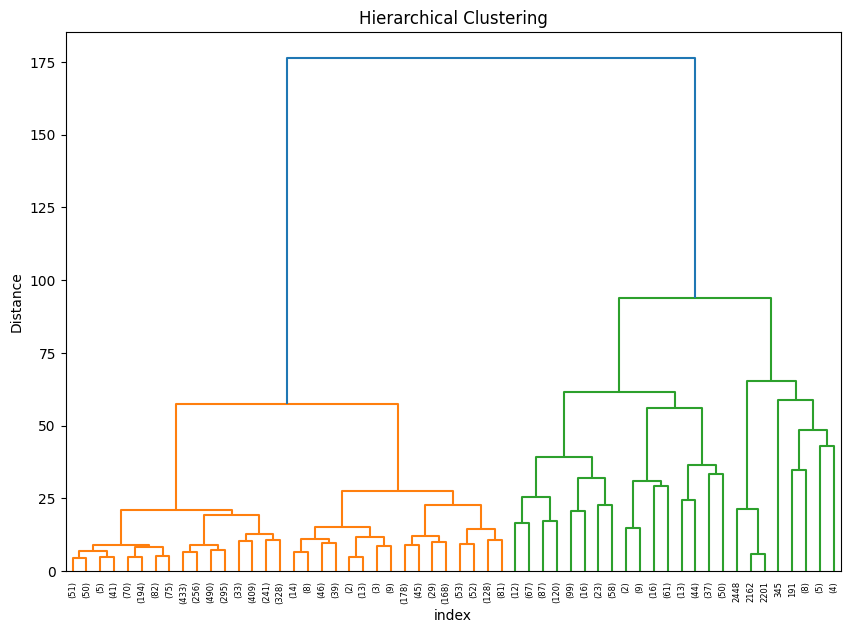

In [61]:
# TODO: Plot dendrogram
plt.figure(figsize=(10, 7))
dendrogram(H , p=5, truncate_mode='level')

plt.title('Hierarchical Clustering')
plt.xlabel('index')
plt.ylabel('Distance')
plt.show()